# Ce projet fonctionne avec les versions des package suivants:

- matplotlib==3.9.0
- pandas==2.2.2
- seaborn==0.13.2
- missingno==0.5.2

## The Data
This is a dataset of food products listing the ingredients and nutritional facts of more than 300,000 foods from over 150 countries in the world. The data is meant to be free to the public to help users decode food labels, and make better food choices in general. The dataset contains more than 300,000 rows over 163 columns. However, as we will see there are a lot of missing or obviously incorrect values.<br/>
Generalities:

- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product


# Importation des packages

In [4]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import tkinter as tk
from tkinter import filedialog

import missingno as msno

# Nettoyer et Filtrer les Features et Produits

## 1.1. Collecter et Préparer les Données Brutes
### 1. Charger les données dans un DataFrame Pandas

In [7]:
# def init():
#     print('Initialisation du projet...', end='\r')
#     filepath ='datas/openfoodfacts.csv'
#     target ='origins'
#     selected = ['countries_fr','origins_tags','nutrition_grade_fr']
#     data = pd.read_csv(f"{filepath}", sep="\t", encoding="utf-8", on_bad_lines="skip", low_memory=False)
#     print(' '*len('Initialisation du projet...'), end='\r')
#     return filepath,target,selected, data

print('Initialisation du projet...', end='\r')
filepath ='datas/openfoodfacts.csv'
target ='main_category_fr'
selected = ['countries_fr','energy_100g','salt_100g','nutrition_grade_fr']
data = pd.read_csv(f"{filepath}", sep="\t", encoding="utf-8", on_bad_lines="skip", low_memory=False)
print(' '*len('Initialisation du projet...'), end='\r')
print('Projet chargé')

Projet chargé              


In [8]:
def select_file():
    print("charger le nouveau fichier")
    root =tk.Tk()
    root.withdraw()

    filepath = filedialog.askopenfilename(
        title="Choisissez votre fichier csv",
        filetypes=(("Fichiers CSV","*.csv"), ("Tous les fichiers","*.*"))
    )
    print(' '*len("charger le nouveau fichier"),end='\r')
    print("chargement en cours...")
    root.destroy()

    if filepath:
        try:
            data = pd.read_csv(f"{filepath}", sep="\t", encoding="utf-8", on_bad_lines="skip", low_memory=False)
            print(' '*len("chargement en cours..."),end='\r')
            print(f"Fichier chargé avec succès depuis le chemin: {filepath}")
            return data
        except Exeption as e:
            print("Erreur lors du chargement du fichier:",e)
    else:
        print("Aucun fichier sélectionné.")

In [9]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# changement d'index
data = data.set_index('code')

In [11]:
# Analyse de la dimension de la base de données
data.shape

(320772, 161)

In [12]:
#Analyse de l'ensemble des variables de la base de données
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 320772 entries, 0000000003087 to 999990026839
Data columns (total 161 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    url                                         320749 non-null  object 
 1    creator                                     320770 non-null  object 
 2    created_t                                   320769 non-null  object 
 3    created_datetime                            320763 non-null  object 
 4    last_modified_t                             320772 non-null  object 
 5    last_modified_datetime                      320772 non-null  object 
 6    product_name                                303010 non-null  object 
 7    generic_name                                52795 non-null   object 
 8    quantity                                    104819 non-null  object 
 9    packaging                                   

In [13]:
data.isna().sum()

url                            23
creator                         2
created_t                       3
created_datetime                9
last_modified_t                 0
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 161, dtype: int64

In [14]:
url='https://world.openfoodfacts.org/data/data-fields.txt'
df_description = pd.read_csv(url, sep="\t", encoding="utf-8", comment='#', header=None)
fields={}
current_category=None
for index, row in df_description.iterrows():
    line =row[0]
    if line.startswith ('#'):
        continue
    if ':' in line:
        key, description=line.split(':',1)
        fields[key.strip()]=description.strip()
    elif len(line.strip()) == 0:
        continue
    else:
        current_category=line.strip()

for key in list(fields.keys()):
    print(f"{key}: {fields[key]}")

See https: //world.openfoodfacts.org/data for more information.
Generalities: 
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
List of fields: 
code: barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
url: url of the product page on Open Food Facts
creator: contributor who first added the product
created_t: date that the product was added (UNIX timestamp format)
created_datetime: date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
last_modified_t: date that the product page was last modified
product_name: name of the product
quantity: quantity and unit
packaging: shape, material
origins: origins of ingredients
manufacturing_places: places where manufactured or transformed
first_packaging_code_geo: coordinates corresponding to the first packaging code indicated
countries: list of countries where the p

In [15]:
# Analyse du type de variables dans la base de données
pd.set_option('display.max_rows',None)
print(data.dtypes)

url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                                   object
manufacturing_places        

## 1.2. Identifier et Sélectionner les Features Pertinentes
### 1.Lister les Features (Colonnes) :

In [17]:
def feature_list(data):
    features = data.columns
    return features

# print(f"Total features:", len(features))
# print(f"Features:", features)


In [18]:
# msno.bar(data, log=True)
# msno.matrix(data)
# msno.heatmap(data)

### 2.Séparer les Features Quantitatives et Qualitatives :

In [20]:
def split_features(data):
    quantitative_features = data.select_dtypes(include=['float64','int64'])
    qualitative_features = data.select_dtypes(include=['object'])
    return quantitative_features,qualitative_features

# print('Quantitative Features\n',quantitative_features.columns )
# print('Qualitative Features\n',qualitative_features.columns )

## 1.3. Choisir une Cible

### 1.Choisir une Feature Cible avec Moins de 50% de Valeurs Présentes :

In [23]:
# missing_percentages = data.isnull().mean() * 100
# features_with_less_than_50_missing = missing_percentages[missing_percentages > 50]
# #missing_percentages.count()
# features_with_less_than_50_missing.count()
# potential_targets = [feature for feature in qualitative_features if feature in features_with_less_than_50_missing]
# #print(list(features_with_less_than_50_missing))

In [24]:
def target_choice(qualitative_features):
    # Calcule le pourcentage de valeurs manquantes pour chaque colonne
    missing_percentages = data.isnull().mean() *100
    
    #Filtrer les features ayant moins de 50% de valeurs manquantes.
    features_with_less_than_50_missing = missing_percentages[missing_percentages > 50]
    
    # Trier par ordre décroissant de pourcentage de valeurs manquantes
    sorted_features = features_with_less_than_50_missing.sort_values(ascending=False)
    
    potential_targets = [feature for feature in sorted_features.index if feature in qualitative_features]

    print(f'{len(potential_targets)} cibles potentiels avec moins de 50% des valeurs / {len(qualitative_features.columns)} features dans l\'ordre. \nSelectionner votre cible dans la liste suivantes :')
    for index, feature in enumerate(potential_targets):
        #num_unique_item = data[feature].nunique()
        nb_fill_each_value= data[feature].count()
        val_null= data[feature].isna().sum()
        percentage_fill_each_value = (nb_fill_each_value / len(qualitative_features) * 100).round(2)
        print(f"{index+1}: {feature}: {percentage_fill_each_value}% des valeurs présentes soit {nb_fill_each_value} valeurs")
        #print(f"{index+1}: {feature}: {num_unique_item} valeurs unique / Pourcentage de valeurs présentes: {percentage_fill_each_value}%")
    try:
        selected_index = int(input('Entrer l\'index de votre cible:'))
        target = potential_targets[selected_index-1]
        print("Feature cible selectionnée:", target)
    except IndexError:
        print("Invalid index. Please restart the selection process.")
    except ValueError:
        print("Invalid input. Please enter a numeric index.")
    return target

In [25]:
#result=data[target].dropna().unique()
#df_result=pd.DataFrame(result, columns=[target])
#print(f'Détail de notre features cibles: {target}')
#df_result

### Supprimer les Lignes (Produits) Sans Valeur Cible :


In [27]:
data[target].isna().sum()

np.int64(236406)

In [28]:
def clean_row_without_target(data,target):
    data_nan = data[data[target].isna()]
    data_cleaned = data.dropna(subset=[target])
    result = data_cleaned.shape
    return data_cleaned
#data_nan.shape

### 3.Séparer la Cible du Reste du Dataset :


In [30]:
def split_dataset_from_target(data_cleaned,target):
    df_without_target = data_cleaned.drop(columns=[target])
    df_with_target=data_cleaned[target]
    return df_without_target

## 1.4. Afficher les Taux de Remplissage des Features

In [32]:
def filling_rate_display(data_cleaned,df_without_target):
    
    filling_rates = data_cleaned.notnull().mean()*100
    sorted_value=df_without_target.count().sort_values(ascending=True)
    sorted_df =df_without_target[sorted_value.index]
    msno.bar(sorted_df)
    msno.matrix(sorted_df)
    msno.heatmap(sorted_df)
    # msno.bar(sorted_df)

## 1.5. Sélectionner des Features Intéressantes

### Sélectionner les Features avec Plus de 50% de Valeurs Présentes :

In [35]:
def select_features_with_more_than_50(df_without_target):
    
    # Filtrer pour garder uniquement les colonnes quantitatives
    # df_without_target = df_without_target.select_dtypes(include=['float64', 'int64'])

    # Calcul le pourcentage de valeurs non nulles pour les colonnes quantitatives
    df_without_target=df_without_target.notnull().mean()*100

    # Sélectionne les features avec plus de 50% de valeurs non nulles
    selected_features = df_without_target[df_without_target>50].index

    # Créer un DataFrame pour afficher les résultats
    selected_features = pd.DataFrame(selected_features,columns=['Features'])
    print('Feature ayant plus de 50% de valeurs que vous pouvez selectionner:\n ')
    for index ,row in selected_features.iterrows():
        print(f'{index+1} : {row["Features"]}')
    return selected_features
#selected_features.columns=['Features']

In [36]:
def features_selection(selected,selected_features):
    nb_element = int(input('Combien de feature voulez-vous utiliser (recommandé 3)'))
    print(f'Selectionnez 1 à {nb_element} éléments:\n')
    #first_element = input(f'Entrez le numéro de votre premier choix pour terminer:')
    #first_element = selected_features.iloc(first_element)
    old_selected = selected
    selected = [] # Pour stocker les features choisis
    while len(selected) < nb_element:
        if len(selected)<nb_element:
            choice_index= input(f"Entrez le numéro de votre choix numéro {len(selected)+1} ou tapez fin pour garder le choix initial")
            if choice_index.lower()=='fin':
                if len(selected)==0:
                    selected = old_selected
                else:
                    return selected
            else:
                try:
                    choice_index= int(choice_index)-1
                    if 0<= choice_index <len(selected_features):
                        feature = selected_features.iloc[choice_index]['Features']
                        if feature not in selected:
                            selected.append(feature)
                            print(f'Vous avez selectionné {feature}')
                            print(f'Features selectionnées:{selected}')
                        else:
                            print("Vous avez déjà sélectionné cette feature. Veuillez choisir une autre.")
                    else:
                        print('Numéro de choix invalide, veuillez entrer un numéro valide.')
                except ValueError:
                    print("Entrée invalide, veuillez entrer un numéro entier.")
    return selected

In [37]:
def clean_duplicate(data_cleaned):
    data_cleaned = data_cleaned.drop_duplicates()
    data_cleaned = data_cleaned.reset_index()
    return data_cleaned

Paramètre par défaut:

chemin du fichier:
 --> datas/openfoodfacts.csv

Cible de l'analyse:
 --> main_category_fr

Features de l'analyse:
 --> ['countries_fr', 'energy_100g', 'salt_100g', 'nutrition_grade_fr']



Souhaitez-vous changer les paramètres par défault?
 O (Oui) / N (Non) n


YOu ARE HERE


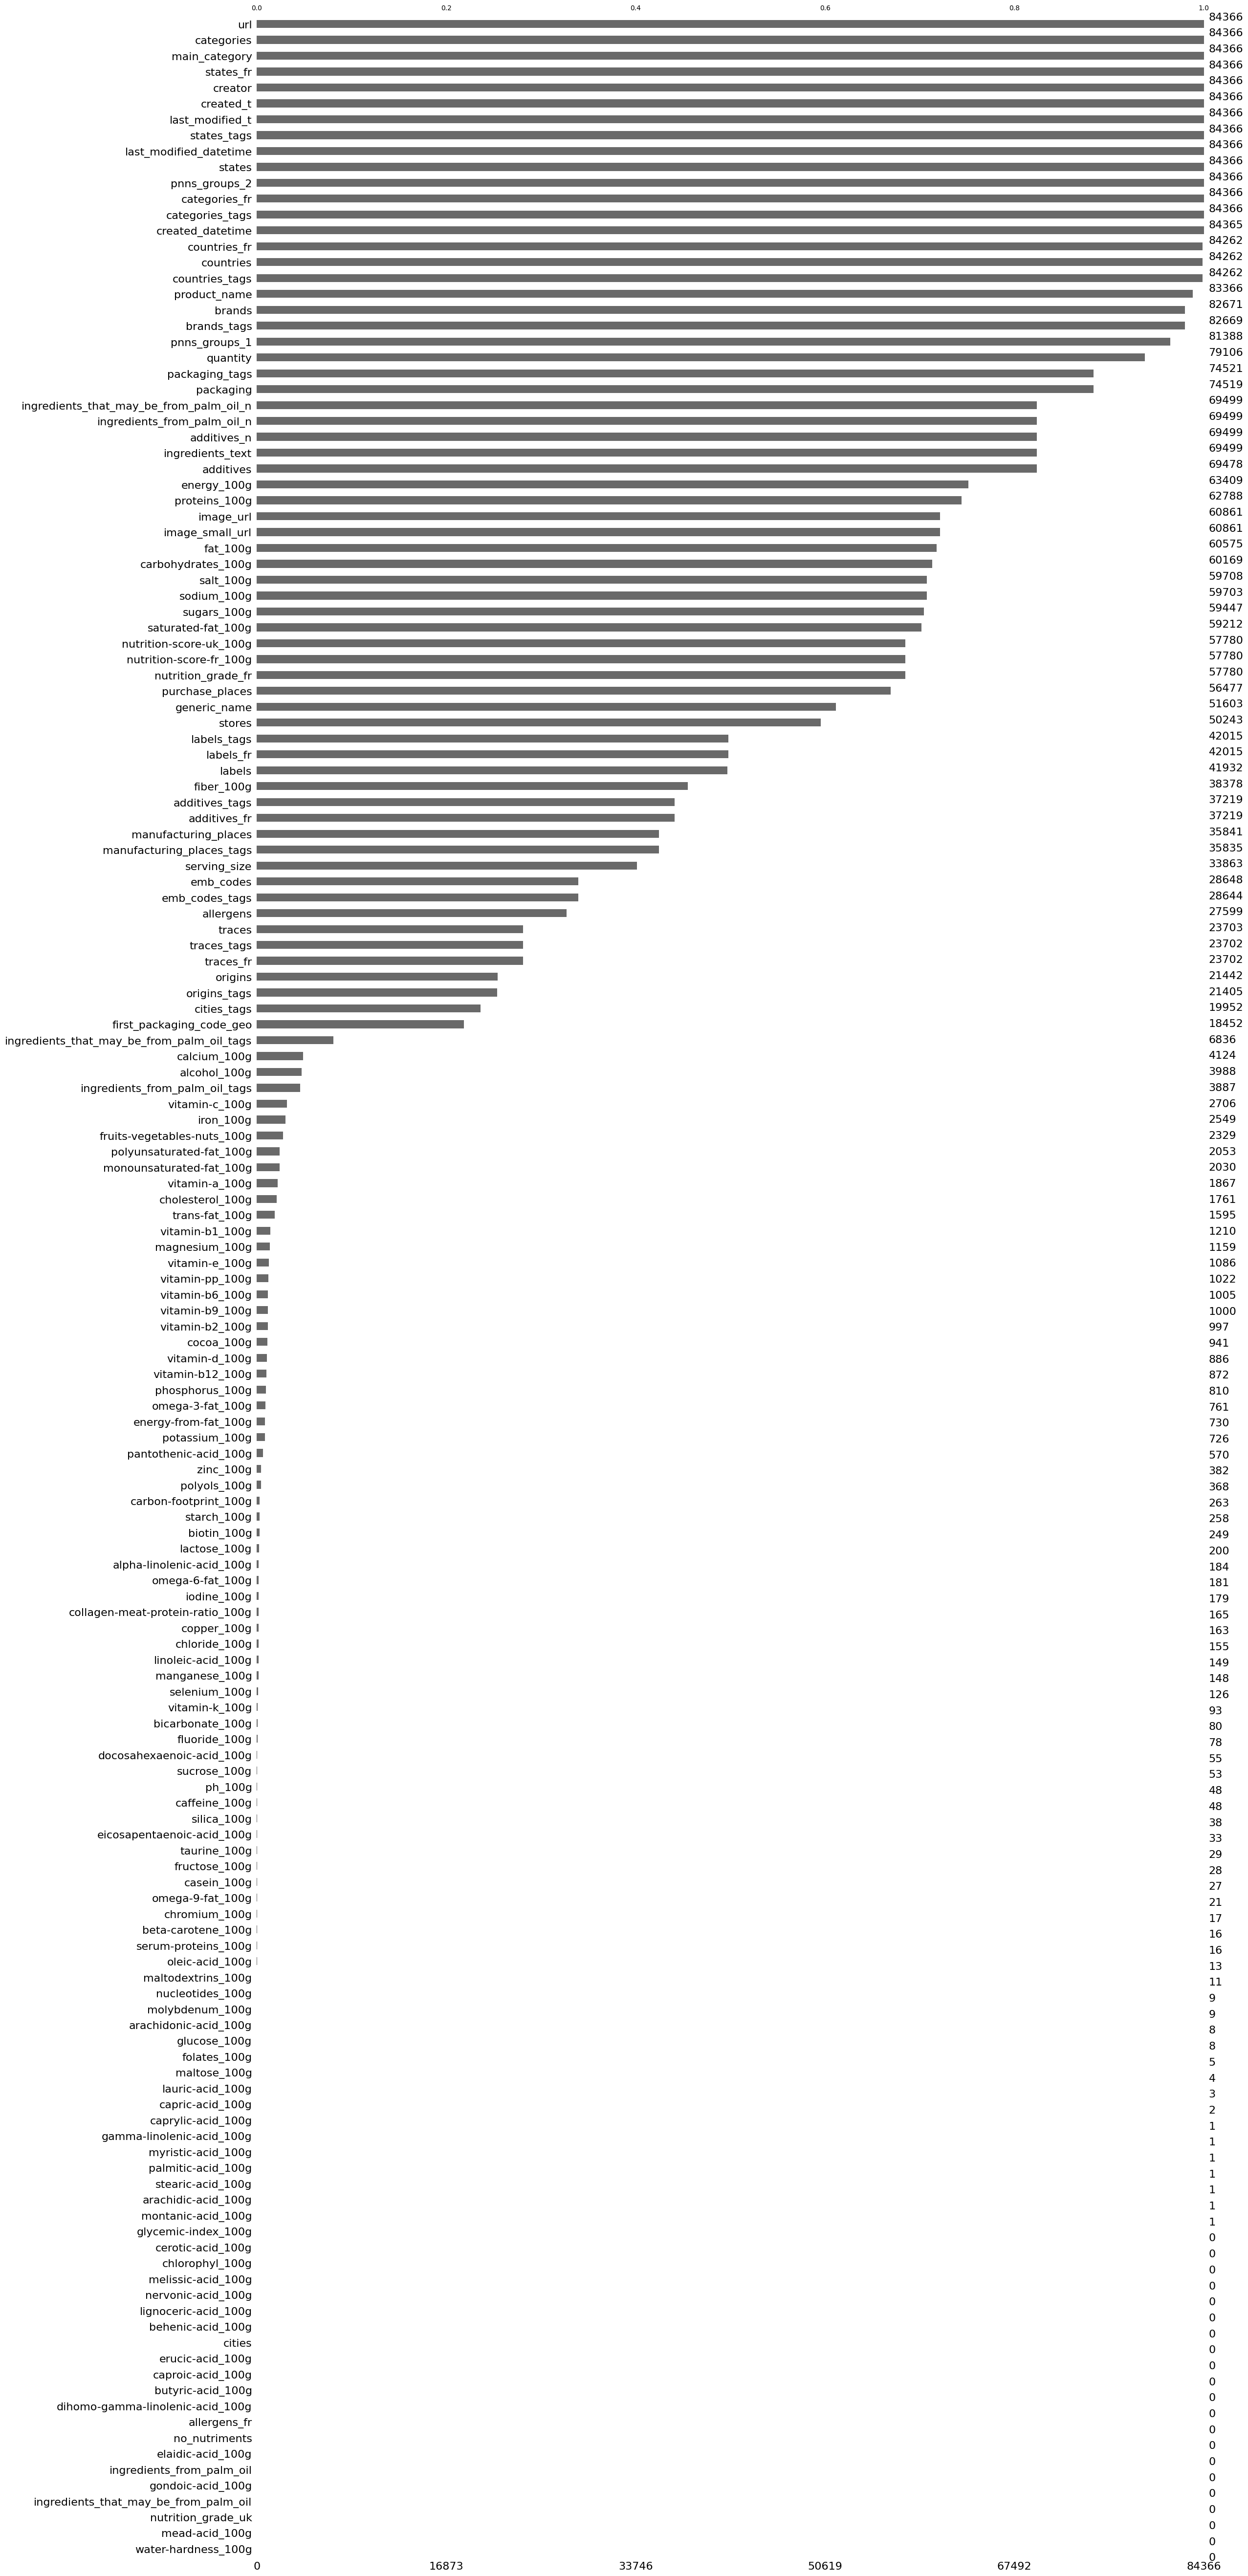

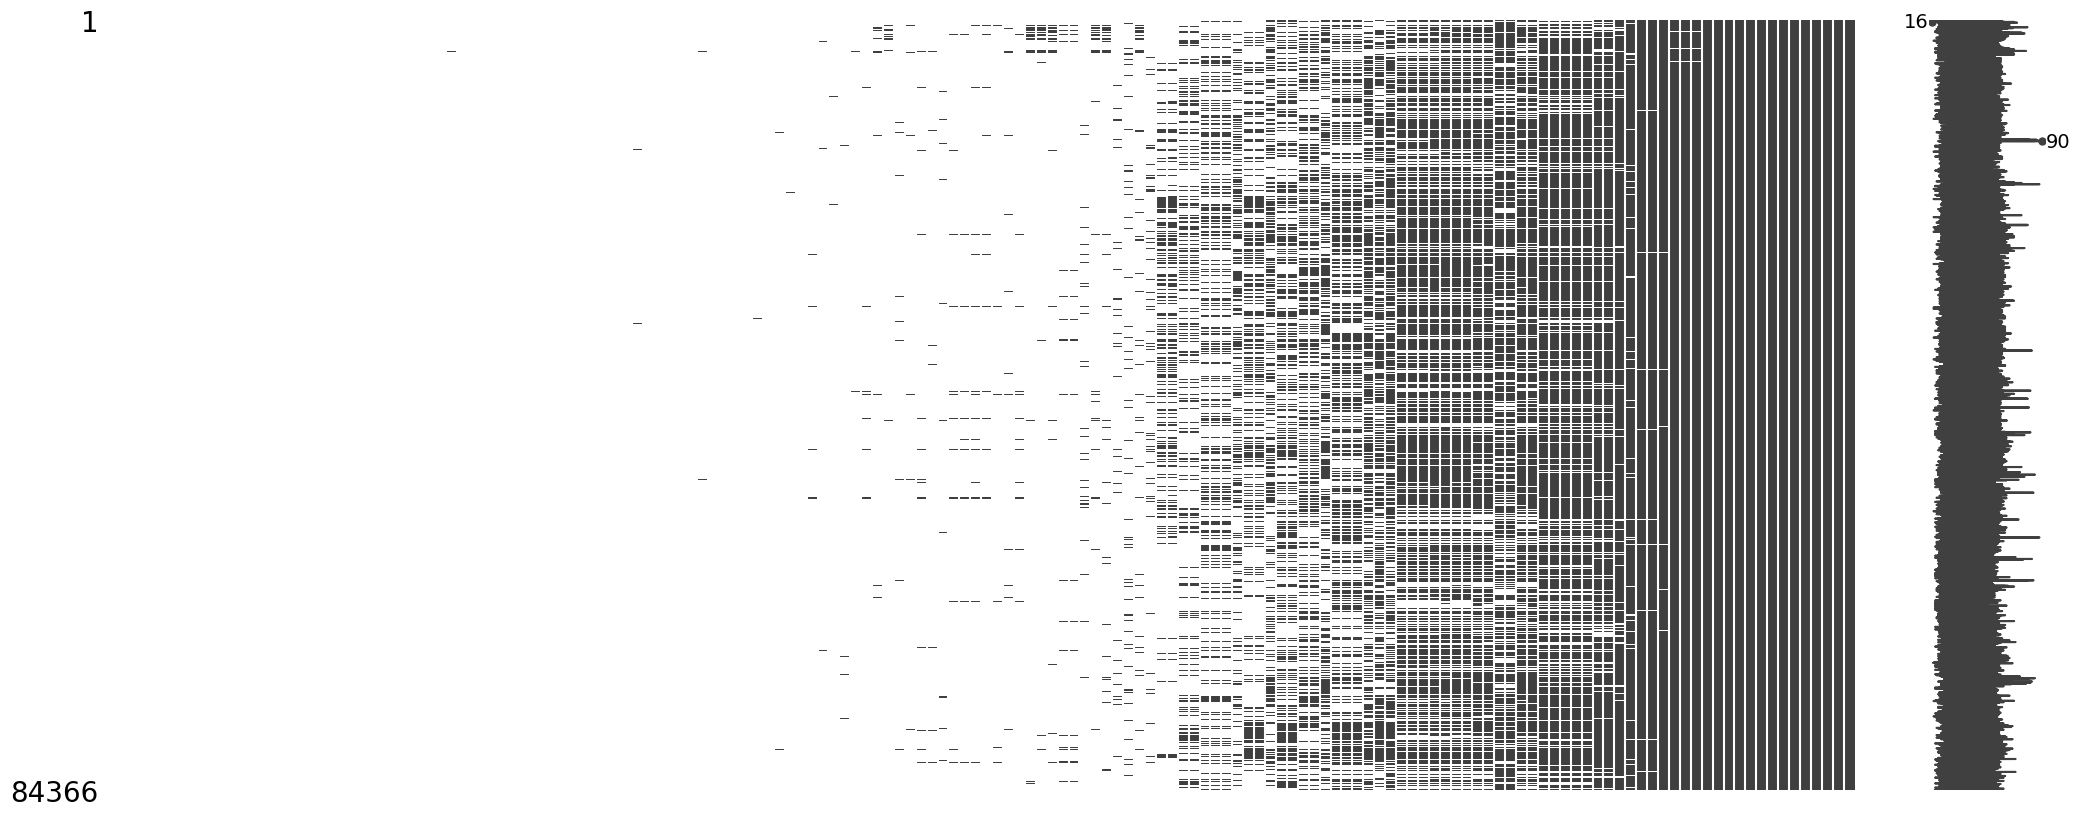

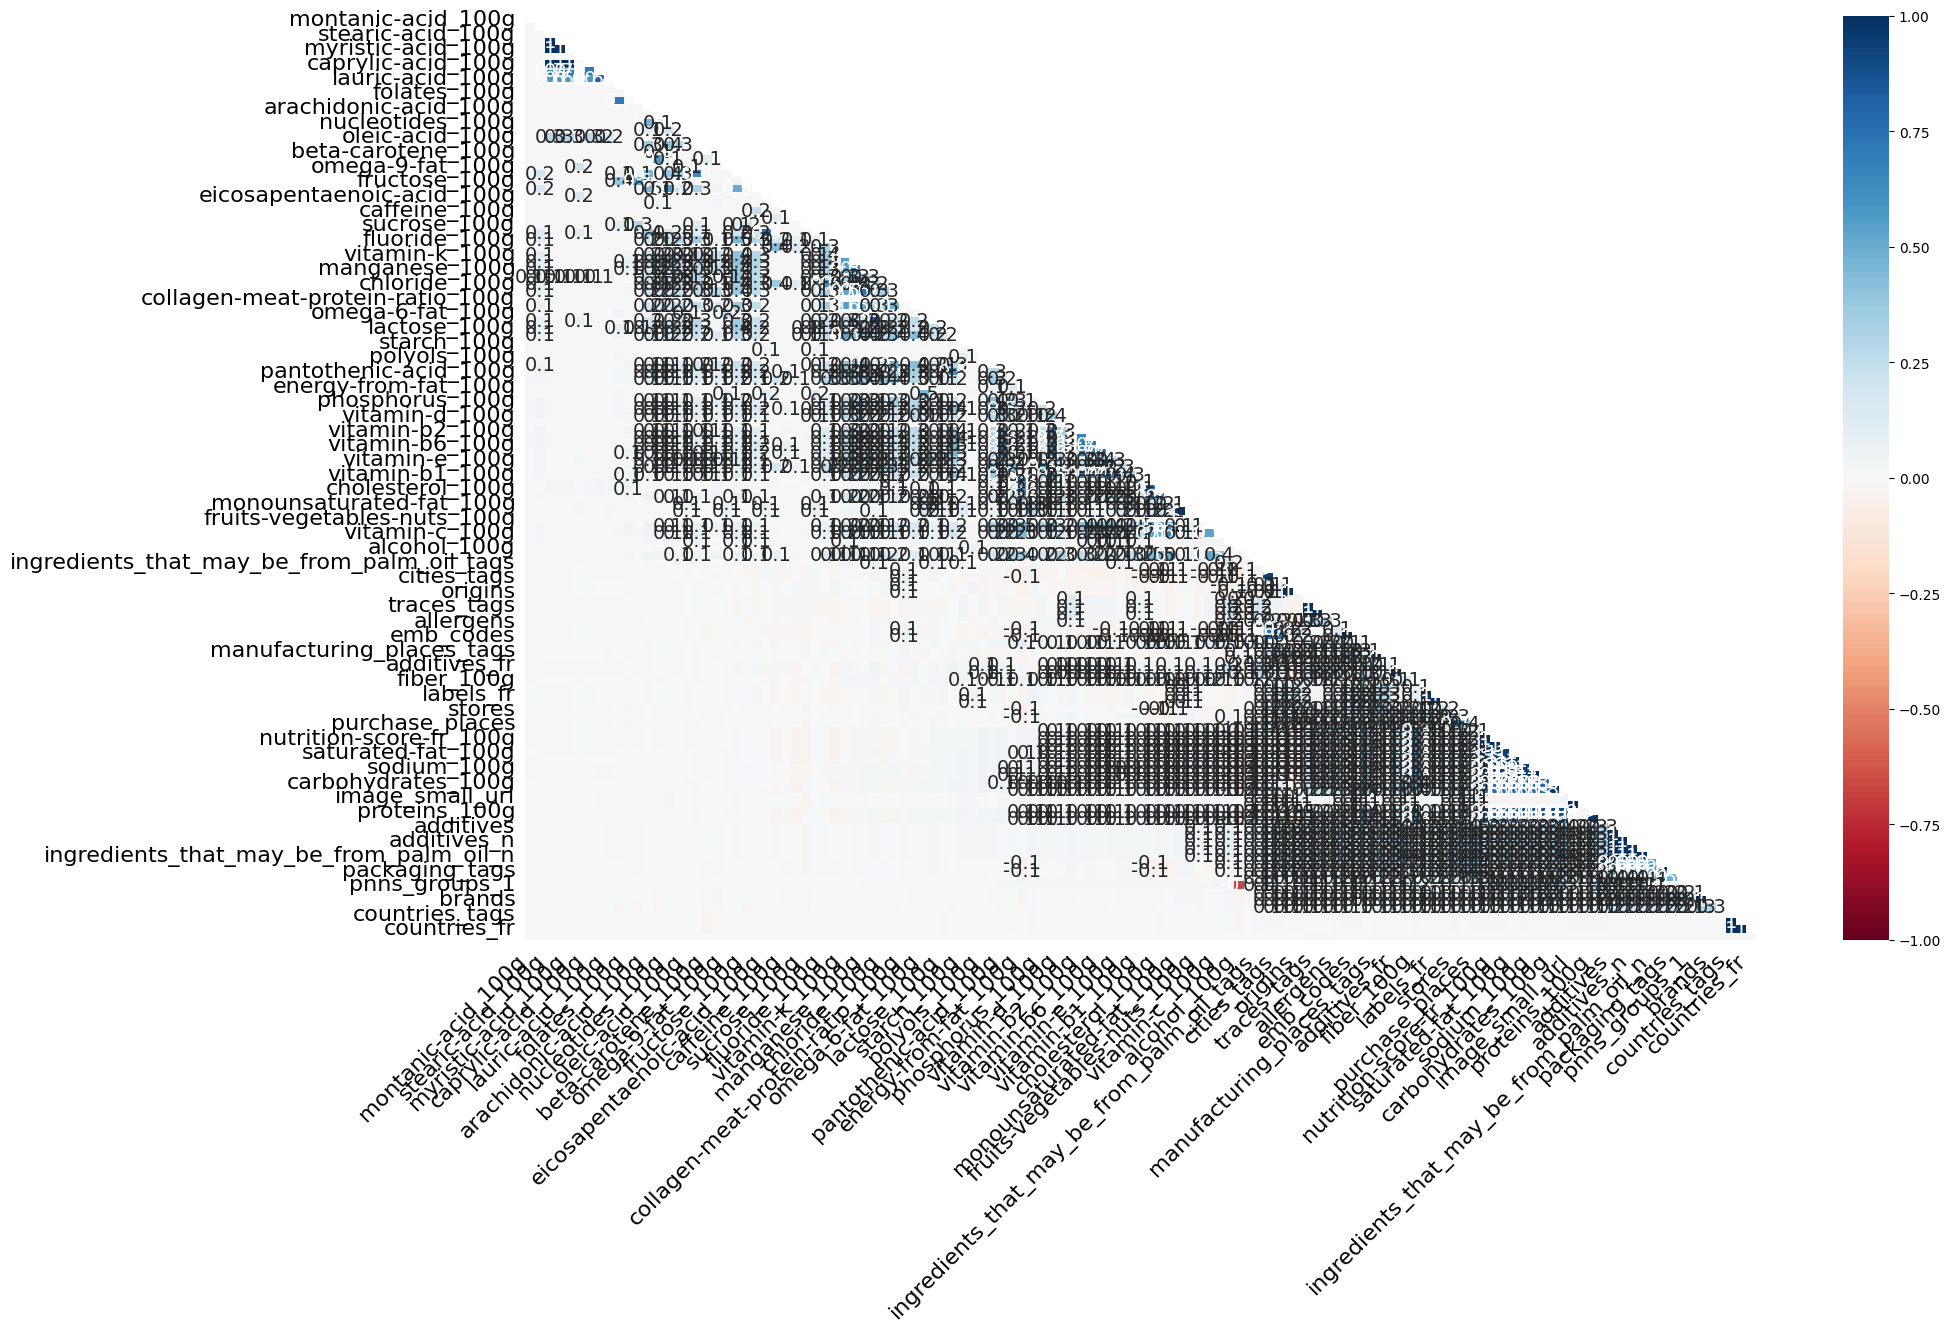

In [38]:
#filepath,target,selected, data=init() #initialisation du fichier local avec la première selection de paramètres
print('Paramètre par défaut:\n')
print(f'chemin du fichier:\n --> {filepath}\n')
print(f'Cible de l\'analyse:\n --> {target}\n')
print(f'Features de l\'analyse:\n --> {selected}\n')
default_params=input('Souhaitez-vous changer les paramètres par défault?\n O (Oui) / N (Non)')



if default_params.lower() == "o":
    
    filepath_params=input('Souhaitez-vous changer de fichier?\n O (Oui) / N (Non)')
    
    if filepath_params.lower()=='o': # Change le fichier de jeu de données
        data = select_file()  #Fonction de selection du nouveau fichier
        feature_list(data) # Liste des colonnes avec le nouveau ficher
    
    quantitative_features, qualitative_features = split_features(data) #Features avec le nouveau ficher
    
    target_params=input(f'Souhaitez-vous changer la cible d\'analye? {target}\n O (Oui) / N (Non)')
    if target_params.lower()=='o':
        target = target_choice(qualitative_features) # Change la cible d'analyse
        data_cleaned = clean_row_without_target(data,target) # Supprime les ligne n'ayant pas de cible
        df_without_target = split_dataset_from_target(data_cleaned,target) #sépare et recupère un dataframe sans la colonne cible
        filling_rate_display(data_cleaned,df_without_target) #Taux de rempissage
        select_features_with_more_than_50(df_without_target)
    
    print(f"cible d'analyse: {target}")
    
    
    selected_params=input(f'Souhaitez-vous changer de Features? actuellement {selected}\n O (Oui) / N (Non)')
    if selected_params.lower()=='o':
        data_cleaned = clean_row_without_target(data,target) # Supprime les ligne n'ayant pas de cible
        df_without_target = split_dataset_from_target(data_cleaned,target) #sépare et recupère un dataframe sans la colonne cible
        
        filling_rate_display(data_cleaned,df_without_target) # Affiche taux de remplissage
        
        selected_features=select_features_with_more_than_50(df_without_target)
        selected =features_selection(selected,selected_features)
    print(f'Nouvelles Features selectionnées:{selected}')
    
else:
    print('YOu ARE HERE')
    # feature_list(data)
    quantitative_features, qualitative_features = split_features(data)
    #print(f'split-----> {qualitative_features}')
    #target_choice(qualitative_features)
data_cleaned = clean_row_without_target(data,target)
df_without_target = split_dataset_from_target(data_cleaned,target)
filling_rate_display(data_cleaned,df_without_target)
    #def cleanAndFilterProductFeatures:


data_clean_duplicate=clean_duplicate(data_cleaned)

columns_to_keep = ['code','product_name','url'] + [target] + selected

# renamed_columns = {col:f'Features_{col}' for col in selected}
# renamed_columns[target] = f'target_{target}'

data_filtered = data_clean_duplicate[columns_to_keep]
# data_filtered = data_filtered.rename(columns=renamed_columns)
# data_filtered

In [39]:
data_filtered.shape

(84366, 8)

# Identifier et traitez les valeurs aberrantes

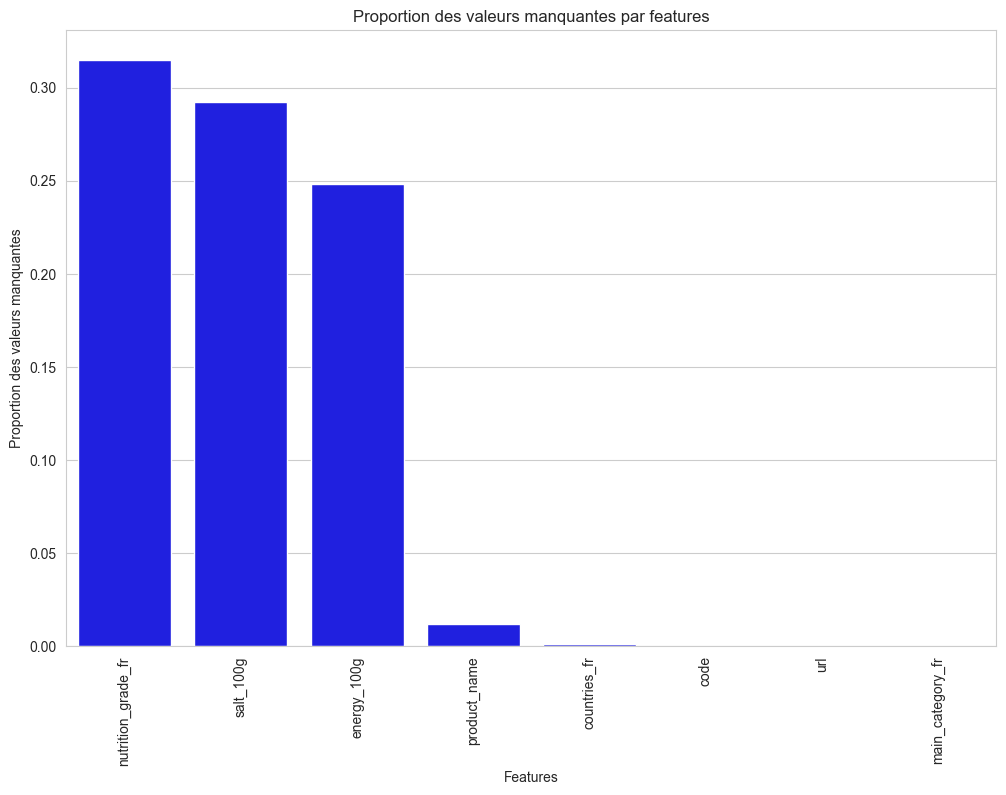

In [41]:
data_filtered_copy=data_filtered.isnull().mean()

data_filtered_copy=data_filtered_copy.sort_values(ascending=False)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=data_filtered_copy.index, y=data_filtered_copy.values, ax=ax,color='blue')

ax.set_xlabel('Features')
ax.set_ylabel('Proportion des valeurs manquantes')
ax.tick_params(axis='x', rotation=90)
# ax.set_xticklabels(data_filtered_copy.index, rotation=90)
ax.set_title('Proportion des valeurs manquantes par features')
plt.show()

In [42]:
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Noto Sans CJK JP']

# fm.findSystemFonts(fontpaths=None,fontext='ttf')
# # Spécifiez le chemin vers le fichier de police installé
font_paths = [
    '/Users/yann/FromNas/Training/IA Engineer/P3_santePublique/dejavu-fonts-ttf-2.37/ttf/DejaVuSans.ttf',  # DejaVu Sans
    '/Users/yann/Library/Fonts/NotoSansCJK.ttc',  # Noto Sans CJK pour les caractères chinois, japonais et coréens
    '/Users/yann/Library/Fonts/NotoSansThai-VariableFont_wdth,wght.ttf'
]
font_props = [fm.FontProperties(fname=font_path) for font_path in font_paths]
plt.rcParams['font.family'] = [fp.get_name() for fp in font_props]
def clean_text(text):
    return ''.join([char if ord(char)>=32 else '' for char in text])


# # Afficher le nom de la police reconnue par Matplotlib
# print("Nom de la police :", font_prop.get_name())
# plt.rcParams['font.family'] = font_prop.get_name()

In [43]:
data_filtered[target].nunique()

3543

In [44]:
# quantitative_features, qualitative_features = split_features(data)

# quantitative_features

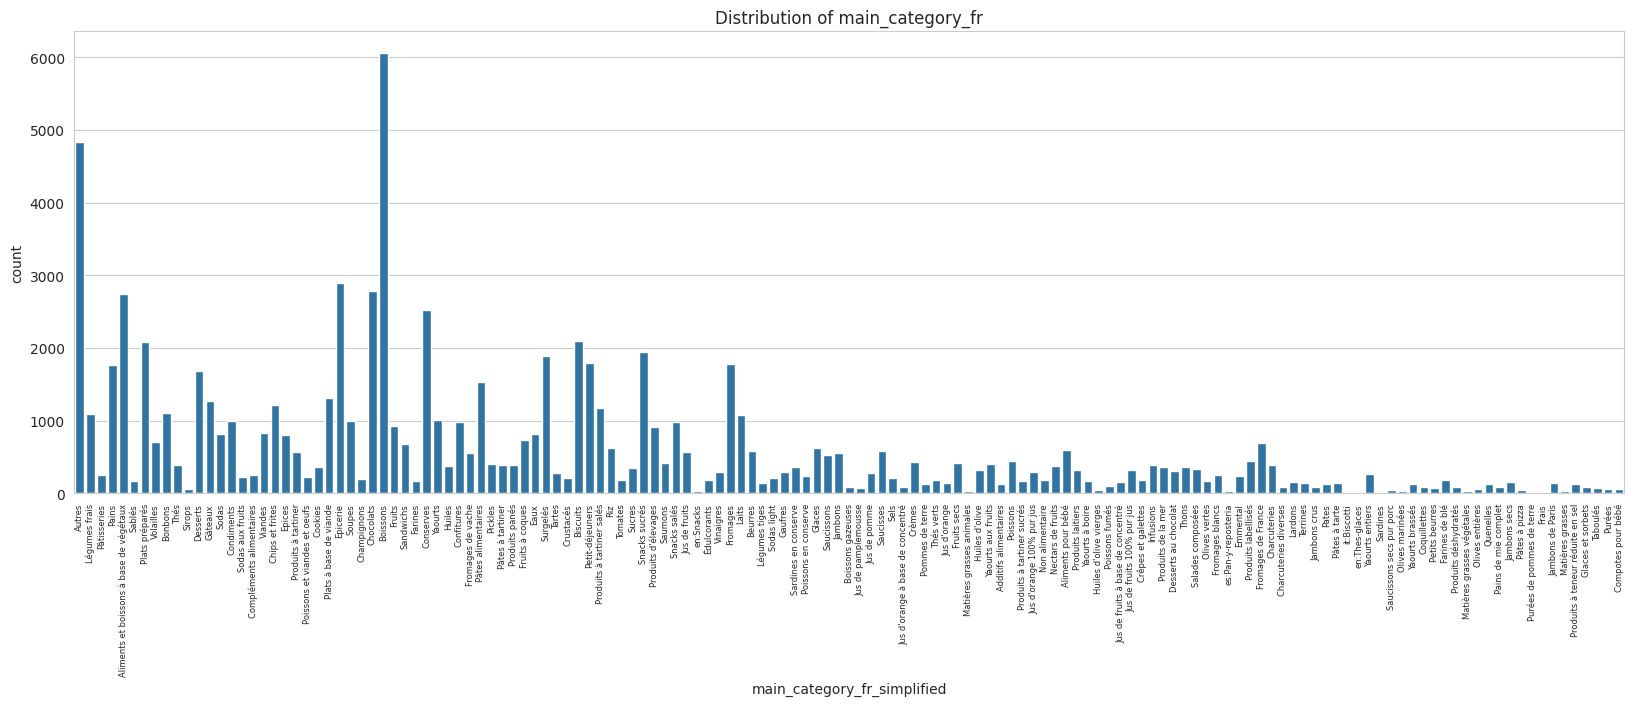

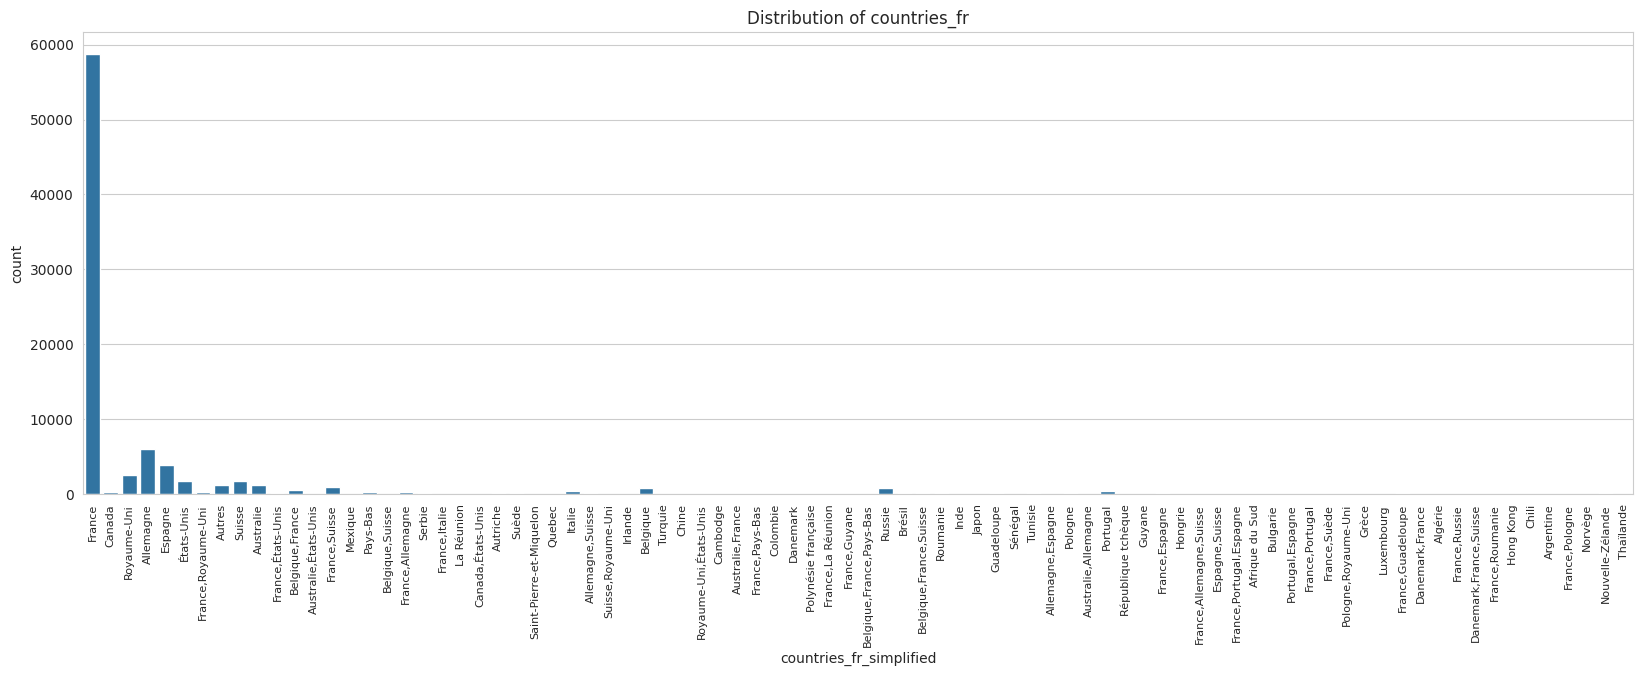

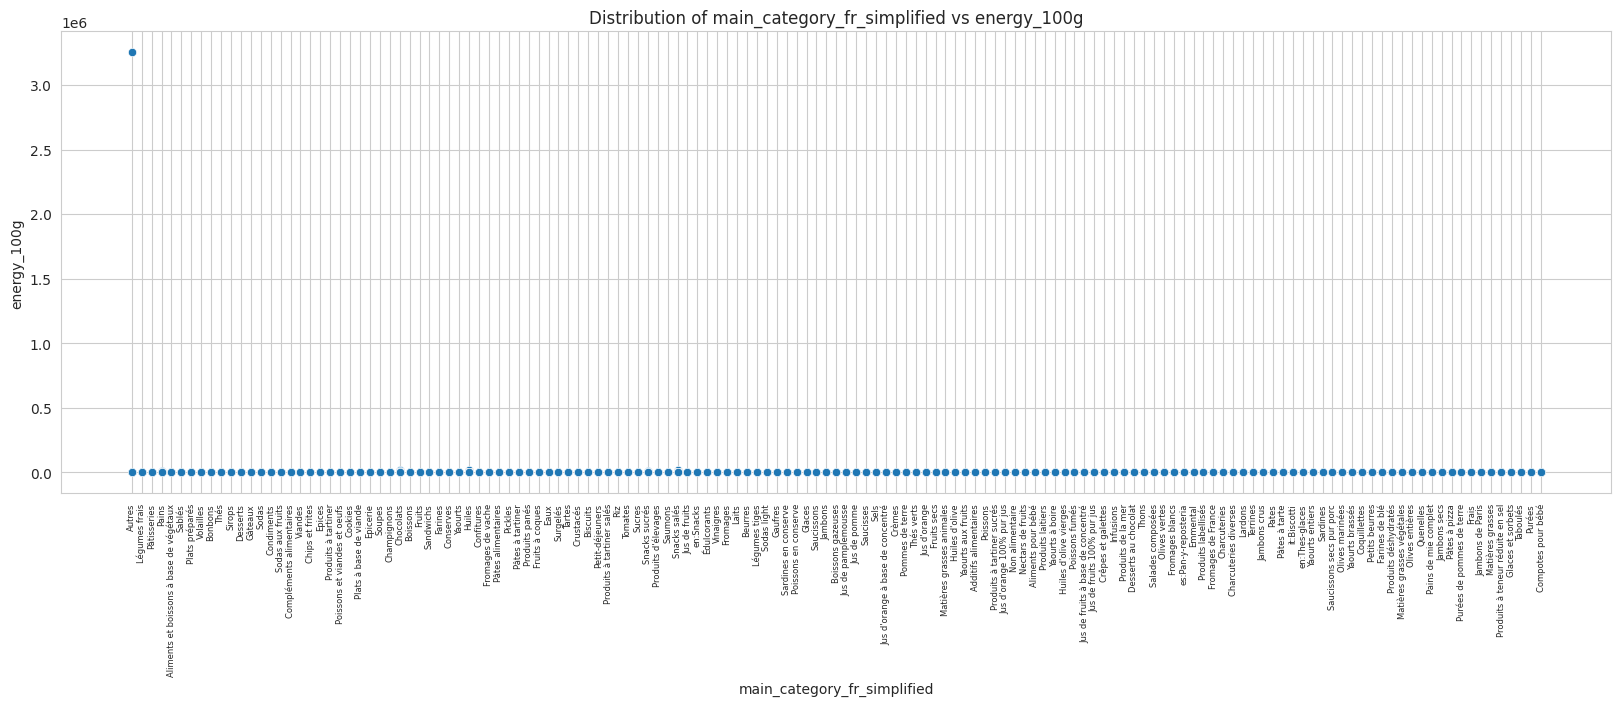

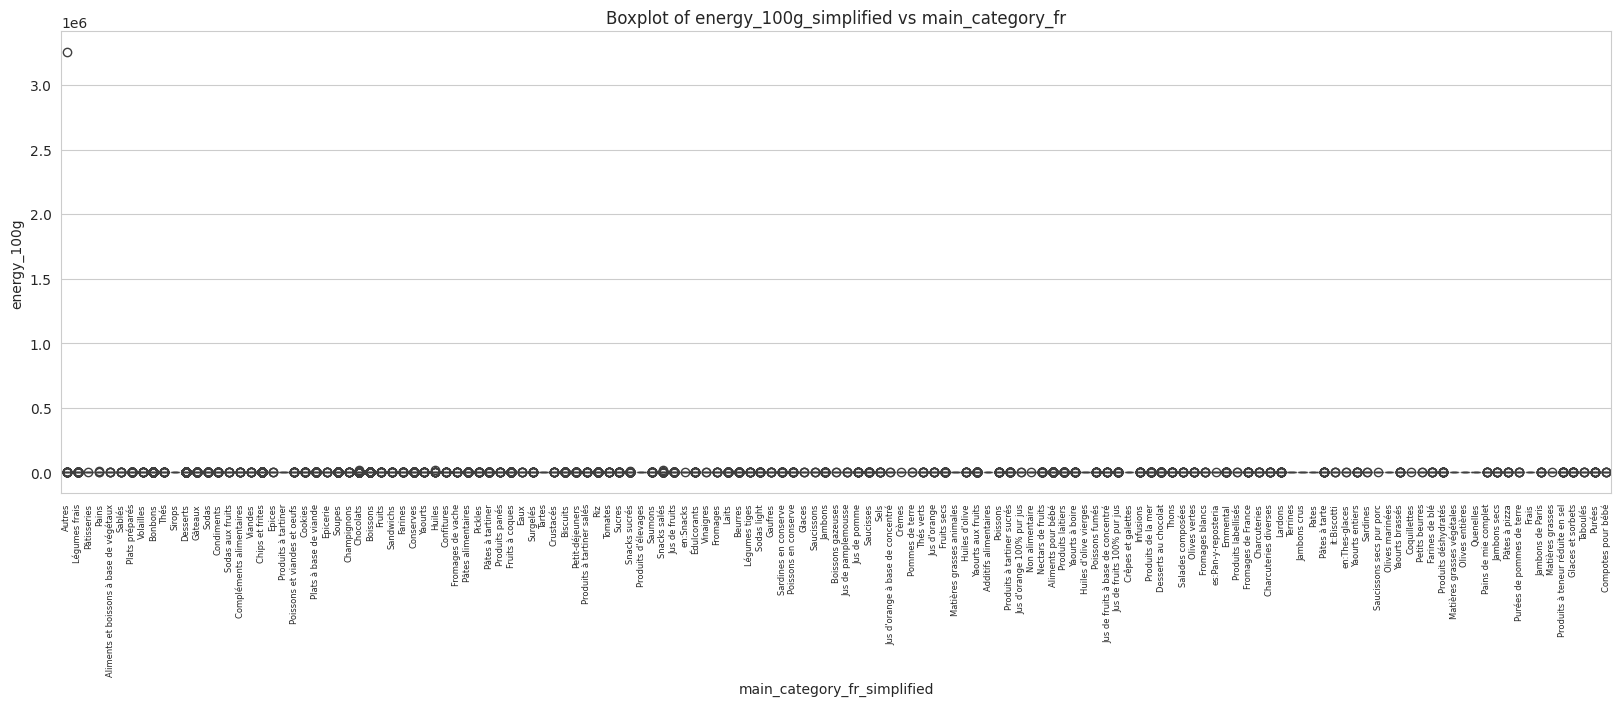

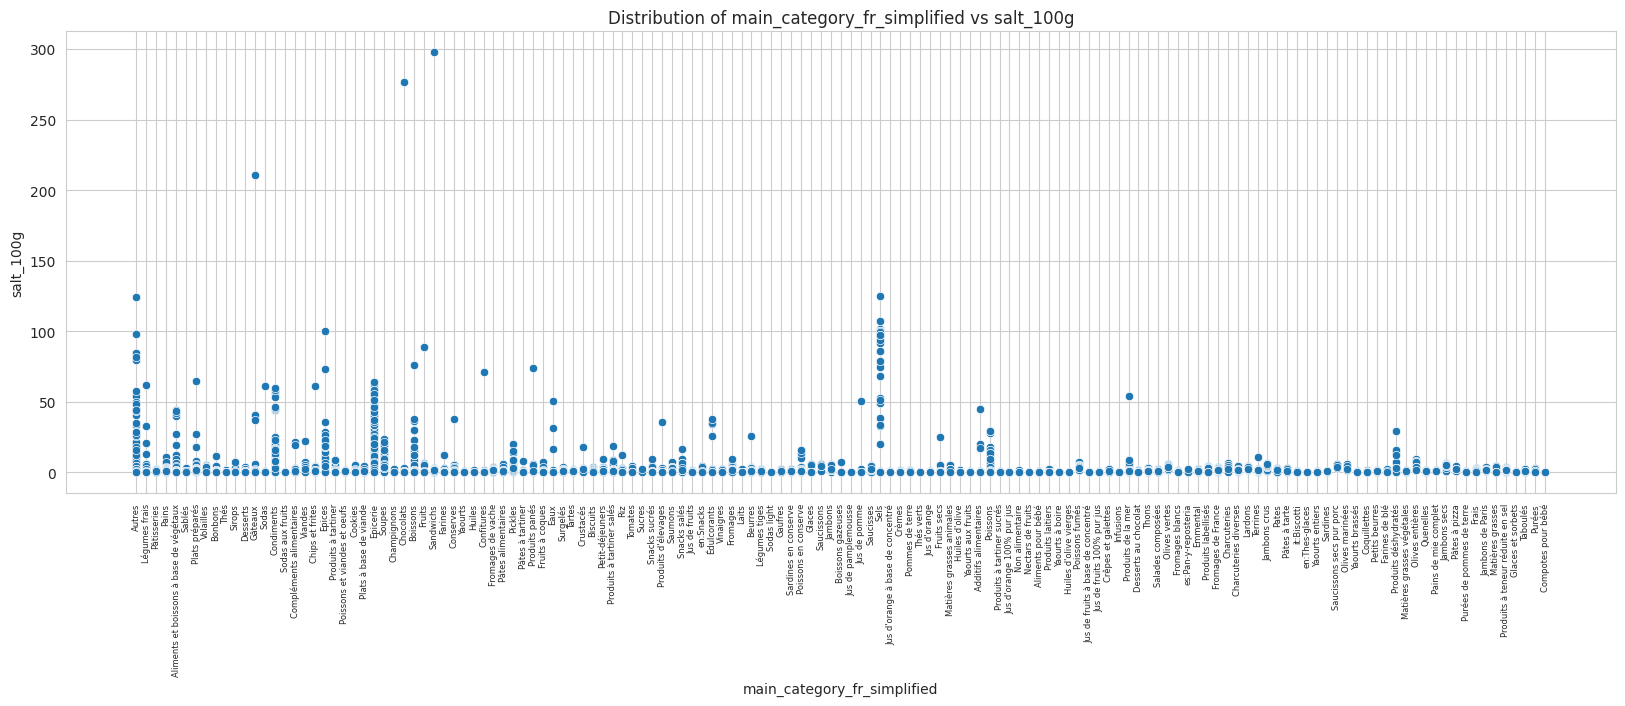

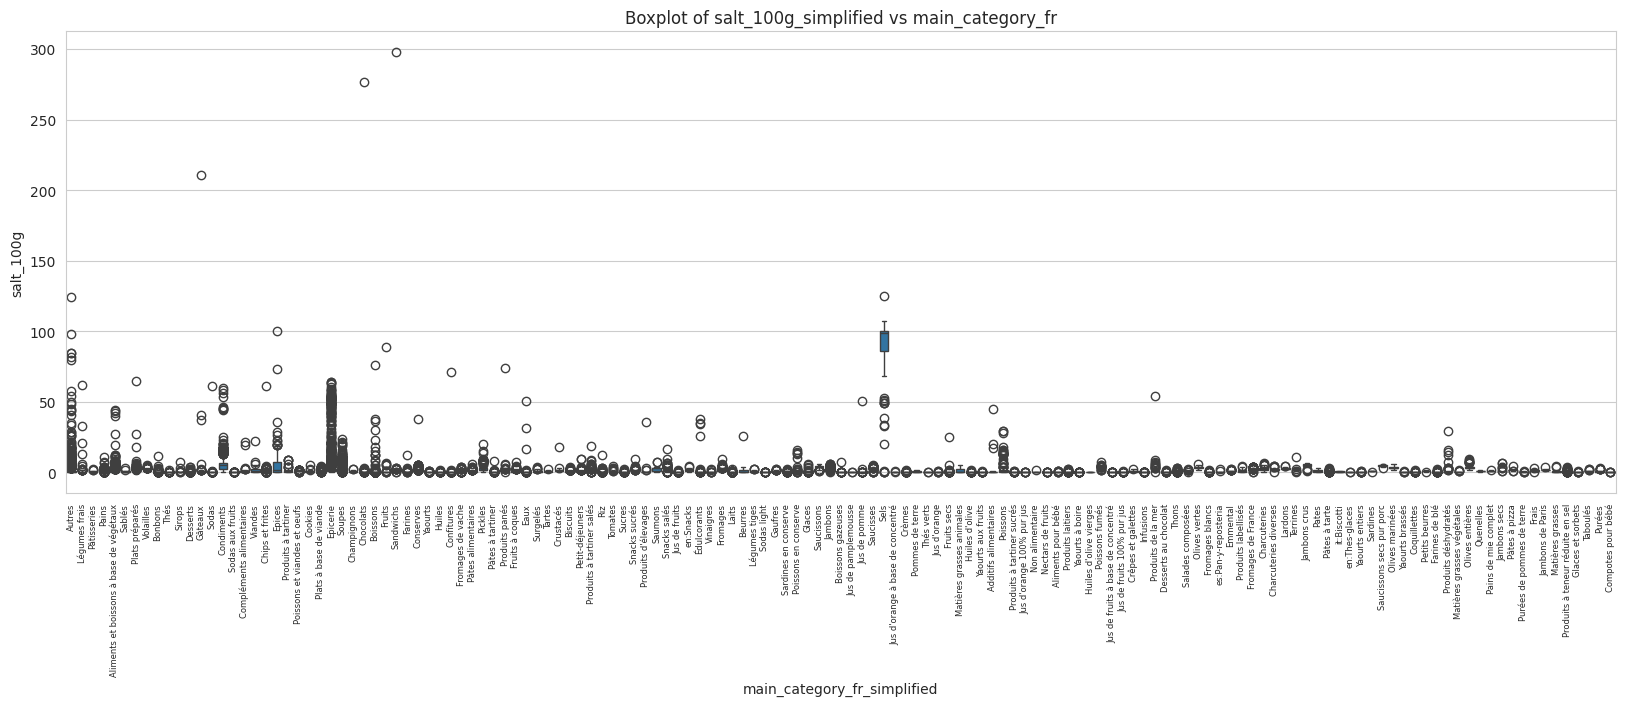

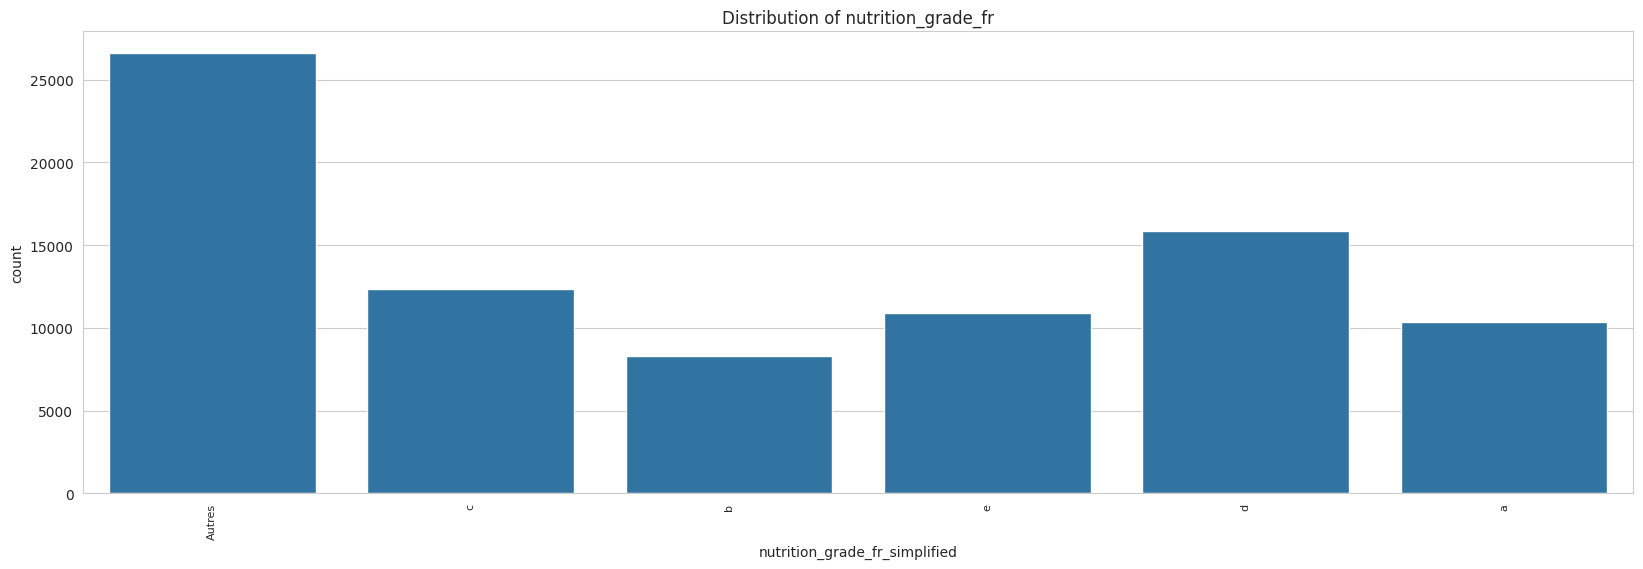

In [45]:
# data_filtered_cleaned = data_filtered.map(lambda x: clean_text(x) if isinstance(x, str) else x)
quantitative_features, qualitative_features = split_features(data_filtered)
threshold = 10
threshold_target = 20

value_counts_target = data_filtered[target].value_counts()
to_keep_target = value_counts_target[value_counts_target>threshold_target].index
data_filtered = data_filtered.copy()
data_filtered[f'{target}_simplified'] = data_filtered[target].apply(lambda x: x if x in to_keep_target else 'Autres')

plt.figure(figsize=(20, 6))

if data_filtered[target].nunique()<20:
    fig, ax =plt.subplots(figsize=(16,14))
    counts = data_filtered[target].value_counts()  # Comptez les occurrences de chaque catégorie
    ax.pie(counts, labels=None, autopct='%1.1f%%',  textprops={'size': 'smaller'},pctdistance=1.1)
    ax.legend(wedges, counts.index, title=target, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.axis('equal')
    plt.title(f'Distribution of {target}')
    plt.show()
    
else:
    sns.countplot(x=f'{target}_simplified', data=data_filtered)
    plt.title(f'Distribution of {target}')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()
    

for feat in selected:
    
    if feat in qualitative_features.columns:
        value_counts = data_filtered[feat].value_counts()
        to_keep = value_counts[value_counts>threshold].index
        data_filtered.loc[:,f'{feat}_simplified']=data_filtered[feat].apply(lambda x:x if x in to_keep else 'Autres')
        # print(f'{feat} is in')
        plt.figure(figsize=(20, 6))
        sns.countplot(x=f'{feat}_simplified', data=data_filtered)
        plt.title(f'Distribution of {feat}')
        plt.xticks(rotation=90, fontsize=8)
        plt.show()
        # plt.tight_layout()
    else:
        plt.figure(figsize=(20, 6))
        sns.scatterplot( y=feat, x=f'{target}_simplified', data=data_filtered)
        plt.title(f'Distribution of {target}_simplified vs {feat}')
        plt.xticks(rotation=90, fontsize=6)
        plt.show()     
        
        plt.figure(figsize=(20, 6))
        sns.boxplot( y=feat, x=f'{target}_simplified', data=data_filtered)
        plt.title(f'Boxplot of {feat}_simplified vs {target}')
        plt.xticks(rotation=90, fontsize=6)
        plt.show()     
    

In [54]:
def missing_prop():
    # Calcul de la proportion de valeurs manquantes pour chaque variable dans la liste
    missing_prop = data_filtered[selected].isna().mean()*100
    missing_prop = missing_prop.round(2).reset_index()

    #Renommage des colonnes
    missing_prop.columns=['variables','missing_prop_en_%']
    
    # Tri par ordre cécroissant de la proportion de valeurs manquantes
    missing_prop= missing_prop.sort_values('missing_prop_en_%', ascending=False)
    missing_prop

In [74]:
data_filtered.isna().sum()

code                                 0
product_name                      1000
url                                  0
main_category_fr                     0
countries_fr                       104
energy_100g                          0
salt_100g                            0
nutrition_grade_fr               26586
main_category_fr_simplified          0
countries_fr_simplified              0
nutrition_grade_fr_simplified        0
dtype: int64

In [68]:
selected

['countries_fr', 'energy_100g', 'salt_100g', 'nutrition_grade_fr']

In [70]:
quantitative_features.columns

Index(['energy_100g', 'salt_100g'], dtype='object')

In [72]:
for feature in selected:
    if feature in quantitative_features.columns:  
        data_filtered[feature]=data_filtered[feature].fillna(0)
        
data_filtered.head()

,code,product_name,url,main_category_fr,countries_fr,energy_100g,salt_100g,nutrition_grade_fr,main_category_fr_simplified,countries_fr_simplified,nutrition_grade_fr_simplified
0,0000000024600,Filet de bœuf,http://world-fr.openfoodfacts.org/produit/0000...,Filet-de-boeuf,France,0.0,0.000,NaN,Autres,France,Autres
1,0000000290616,Salade Cesar,http://world-fr.openfoodfacts.org/produit/0000...,Légumes frais,Canada,1210.0,2.160,c,Légumes frais,Canada,c
2,0000000394710,Danoises à la cannelle roulées,http://world-fr.openfoodfacts.org/produit/0000...,Pâtisseries,Canada,1520.0,0.922,NaN,Pâtisseries,Canada,Autres
3,0000001071894,Flute,http://world-fr.openfoodfacts.org/produit/0000...,Pains,Royaume-Uni,0.0,0.000,NaN,Pains,Royaume-Uni,Autres
4,0000001938067,Chaussons tressés aux pommes,http://world-fr.openfoodfacts.org/produit/0000...,Pâtisseries,Canada,1090.0,0.647,c,Pâtisseries,Canada,c
